In [1]:
# Hidden TimeStamp
import time, datetime
st = datetime.datetime.fromtimestamp(time.time()).strftime('%Y-%m-%d %H:%M:%S')
print('Last Run: {}'.format(st))

Last Run: 2016-09-15 15:36:21


In [2]:
# Run this cell only once
from IPython.display import clear_output
import pandas as pd

%cd ../
clear_output()

pd.set_option('display.max_columns', 9)
pd.set_option('precision', 4)

# Getting Started

This guide will assist you in plotting stress distributions as seen in the [quick view section](quickview.ipynb). 

## Using LamAna with Jupyter (recommended)

**LamAna was developed with visualization in mind**.  

LamAna works best with the [Jupter Notebook 4.0+](http://jupyter.org/).  The Jupyter Notebook is a powerful, browswer-based analytical tool that integrates with many computer languages and runs computations in separate *cells* .  We use Jupyter and Python to make plots using a `matplotlib` backend.

If you installed Anaconda, you have Jupyter installed already.  Simply run Jupyter, open a new notebook and `import lamana`:

    > jupyter notebook
    
![Importing in a Jupyter notebook](../docs/_images/import_lamana.png)


## Using LamAna from Commandline

If visualization is not important to you, you can alternatively run calcuations and export data from the commandline.  You can invoke either `python` or `ipython` for and interactive prompt.

![Importing from commandline](../docs/_images/import_lamana_cmd.png)

We will now explore how the user can **input data** and **generate plots** using the `distributions` feature module.

##  Setup

There are two main steps that are required before plotting.  First we must input *loading parameters* and *material properties*.  Secondly, we must invoke a suitable model based on laminate theory.  The former requires knowlege of the specimen dimensions, the materials properties and loading configuration.  For illustration, an schematic of laminate loading parameters is provided below.

![Loading Parameters](./_images/load_params.png)

A table is provided defining the illustrated parameters.  These loading parameters are coded in a Python dictionary called `load_params`. 

| Parameter | Units (SI) | Definition |
| :-------: | :--------: | :--------- |
| *P* | N | applied load |
| *R* | m | specimen radius | 
| *a* | m | support radius |
| *b* | m | piston radius |
| *r* | m | radial distance from central loading |
| *p* | - | graphical points or DataFrame rows per layer |

### User Defined Parameters

Sample code is provided for setting up loading parameters, material properties and geometric dimensions.  Notice preliminary data is stored in Python dicitionaries, namely `load_params`, `mat_props`.   Geometric data is stored as strings in lists in the for outer-inner-middle layers.

In [3]:
# SETUP -----------------------------------------------------------------------

import lamana as la

# For plotting in Jupyter
%matplotlib inline                                         

# Build dicts for loading parameters and material properties 
load_params = {
    'P_a': 1,                                              # applied load 
    'R': 12e-3,                                            # specimen radius
    'a': 7.5e-3,                                           # support radius 
    'p': 4,                                                # points/layer
    'r': 2e-4,                                             # radial distance from center loading
}

mat_props = {
    'HA': [5.2e10, 0.25],                                  # modulus, Poissions ratio
    'PSu': [2.7e9, 0.33],            
}

# Build a list of geometry strings.
# Layer convention: 'outer - [{inner...-...}_i] - middle'
geos1 = ['400-400-400', '400-200-800', '400-350-500']      # eq. total thickness
geos2 = ['400-[400]-400', '400-[200,100]-800']             # eq. outer thickness 
#------------------------------------------------------------------------------

## Generate Data in 3 Lines

With the **loading and material** information, we can make stress distribution plots to define reusable test **cases** by implementing 3 simple steps. 

1. *Instantiate* a Feature object with loading and material parameters. This makes a user `Case` object. 
1. `apply()` a laminate theory model
1. `plot()` the `Case`

Within seconds, you can now build a case and simultaneously plot stress distributions for an indefinite number of laminates that may vary in compostion and dimension.

Converting mat_props to Standard Form.
User input geometries have been converted and set to Case.


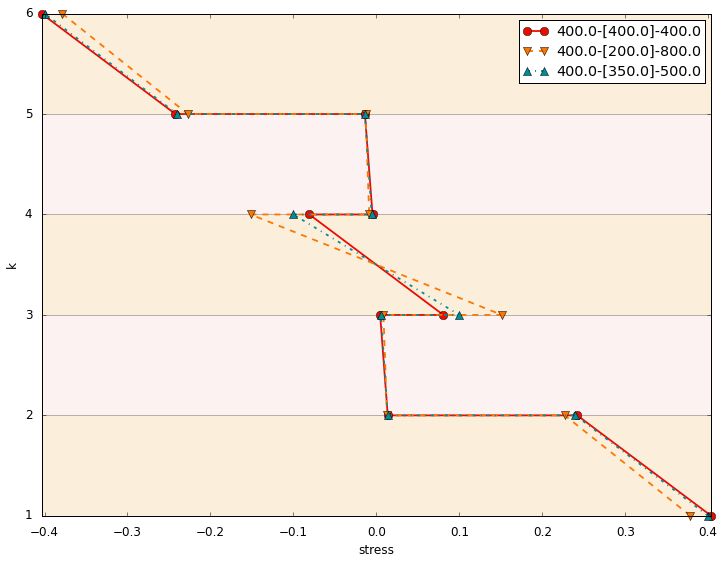

In [4]:
case1 = la.distributions.Case(load_params, mat_props)      # instantiate
case1.apply(geos1, model='Wilson_LT')                      # apply 
case1.plot()                                               # plot 

## Other Attributes

A case stores all of the laminate data for a particular set of parameters in two forms: a Python *dictionary* and a `pandas` *DataFrame* (see tutorial for details). Once a case is built, there are serveral covenient builtin attributes for accessing this data for further analysis and plotting them as `matplotlib` plots.  These tools are powerful and open source.

```python
# Case Attributes
case.geometries                                            # geometry object
case.total                                                 # total laminate thickness (all)                
case.inner                                                 # layer thickness (all)    
case.total_inner                                           # total layer type (all) 
case.total_inner[0]                                        # slicing
case.total_inner_i                                         # total inner layers
case1.snapshot                                             # list of all geometry stacks (unique layers)
case1.frames                                               # list all DataFrames (all layers)
```

## Extensibile

**LamAna is extensible**.  Users can define custom or modified models based on laminate theory and apply these models to cases (see the Theories section for more details).

We can perform sepearate analyses by building different cases and applying different models (default model: "Wilson_LT" for circular disks in biaxial flexure).

```python
# Classical Laminate Theory
case2 = la.distributions(load_params, mat_props)           # instantiate 
case2.apply(geos2, model='Classic_LT')                     # apply model
case2.plot()

# Custom Biaxial Flexure Model
case3 = la.distributions(load_params, mat_props)           # instantiate 
case3.apply(geos2, model='Wilson_LT')                      # custom model
case3.plot()
```